Any high-dimensional sample -- images, sound files, or thoughtfully collected attributes can all be considered as single points in a high dimensional feature-space.

We will be testing isomap on a carefully constructed dataset of the Amsterdam Library of Object Images that hosts a huge collection of 1000 small objects that were photographed in a very controlled environment with the sole objective of systematically varying the viewing angle, illumination angle, and illumination color for each object separately. 

Manifold extraction, and isomap specifically are really good with vision recognition problems, speech problems, and many other real-world tasks, such as identifying similar objects, or objects that have undergone some change. 

We will start by loading the two directories filled with 192 x 144 pixel images. We will then identify their ordering and try to figure out what's changing between the images. And one interesting part is even though the images in the dataset might not be perfectly ordered, but it doesn't matter to isomap.

In [1]:
import pandas as pd
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import glob
from sklearn.manifold import Isomap
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

We will now create a regular Python list object and run a for-loop that iterates over the images in the required dataset folder, appending each of them to above created list. Two things to keep in mind are --
    1. Each .PNG image should first be loaded into a temporary NDArray. We do that using the  misc.imread()
    2. Each image should be resampled down by a factor of two and further be converted from  0-255  to  0.0-1.0

In [2]:
samples = [] 

directory_list1 = glob.glob('Datasets/ALOI/32/*.png')
# iterating through file names
for filename in directory_list1:
    # loading image to array with imread
    img = misc.imread(filename); 
    # converting 1d and unitize
    samples.append( (img[::2, ::2] / 255.0).reshape(-1) ) 

directory_list2 = glob.glob('Datasets/ALOI/32i/*.png')
for filename in directory_list2:  
    img = misc.imread(filename);
    samples.append( (img[::2, ::2] / 255.0).reshape(-1) )

In [3]:
marker_color = []
# Giving two separate colours for files from two directories to easily identify the differences
for i in range(len(directory_list1)):
    marker_color.append('b')
    
for _ in range(len(directory_list2)):
    marker_color.append('g')

In [4]:
# Converting the list to a dataframe
print(len(samples))
df = pd.DataFrame(samples)
print(df.head(2))
print(df.shape)

84
       0         1         2         3         4         5         6     \
0  0.015686  0.015686  0.011765  0.011765  0.011765  0.011765  0.011765   
1  0.015686  0.015686  0.015686  0.011765  0.015686  0.011765  0.011765   

       7         8         9       ...         6902      6903     6904  \
0  0.011765  0.011765  0.011765    ...     0.054902  0.050980  0.05098   
1  0.015686  0.015686  0.015686    ...     0.050980  0.054902  0.05098   

      6905      6906      6907      6908     6909     6910      6911  
0  0.05098  0.047059  0.050980  0.047059  0.05098  0.05098  0.047059  
1  0.05098  0.050980  0.054902  0.050980  0.05098  0.05098  0.050980  

[2 rows x 6912 columns]
(84, 6912)


In [5]:
#
# Implementing Isomap here. 
iso = Isomap(n_neighbors = 6, n_components =3)
iso.fit(df)
manifold = iso.transform(df)

We will now plot the first two manifold components using a 2D scatter plot and then plot the first three components using a 3D scatter plot.

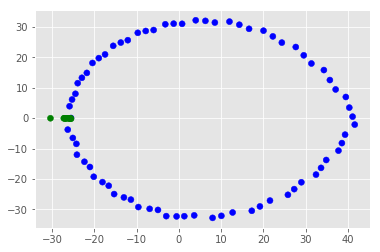

In [6]:
#
# Creating a 2D Scatter plot to graph the manifold. 
plt.scatter(manifold[:, 0], manifold[:, 1], marker='o', c=marker_color)

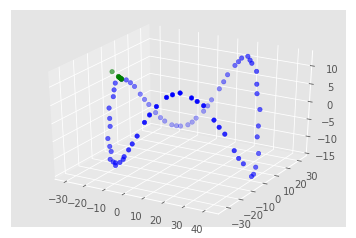

In [7]:
#
# Creating a 3D Scatter plot to graph your manifold.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(manifold[:, 0], manifold[:, 1], manifold[:, 2], c=marker_color)
plt.show()